<a href="https://colab.research.google.com/github/ManasChandan/TwitterSentimentAnalysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# Label = 0 (Non Sexist) = 1 (Sexist)
train_data = train_data.drop('id' , axis = 1)
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


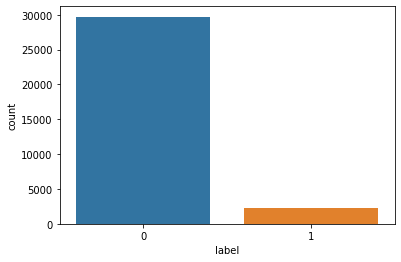

In [ ]:
import seaborn as sns
sns.countplot(train_data.label)

In [ ]:
# Better To obsereve accuracy as well as F1 score . 
train_data.shape

(31962, 2)

In [ ]:
# Preprocessing
import nltk # NLP LIB
import re # FOR REMOVING
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # Stemming.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus_tweets = []
ps = PorterStemmer()
for i in range(0,31962):
  tweet = re.sub(pattern='[^a-zA-Z]',repl=' ', string=train_data['tweet'][i])

  tweet = re.sub(pattern='user' , repl='' , string = tweet)

  tweet = tweet.lower()

  words = tweet.split()

  words = [ps.stem(word) for word in words if not word in stopwords.words('english')]

  tweet = ' '.join(words)

  corpus_tweets.append(tweet)

In [ ]:
corpus_tweets[0:3]

['father dysfunct selfish drag kid dysfunct run',
 'thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti']

In [ ]:
# Converting into useful numbers using Tokenizer , Padding and Embeddings . 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

In [ ]:
# Our input is Corpus_tweets . 
training_size = 30000
train_corpus  = corpus_tweets[:training_size]
test_corpus = corpus_tweets[training_size:]
tokenizer = Tokenizer(num_words = 1000 , oov_token = '<OOV>')
tokenizer.fit_on_texts(train_corpus)

In [ ]:
train_sequence = tokenizer.texts_to_sequences(train_corpus)
test_sequence = tokenizer.texts_to_sequences(test_corpus)

In [ ]:
print(type(train_sequence))

<class 'list'>


In [ ]:
def get_max_lenghth(data):
  max = 0
  for i in range(len(data)):
    length = len(data[i])
    if length >  max :
      max = length
  return max

maximum_length = get_max_lenghth(train_sequence)
print(maximum_length)

23


In [ ]:
train_sequence = pad_sequences(train_sequence , maxlen=maximum_length , padding='post')
test_sequence = pad_sequences(test_sequence , maxlen=maximum_length , padding='post')

In [ ]:
train_sequence[0:3]

In [ ]:
embedding_vector = 32
max_vocab = 1000


In [ ]:
embeder = Sequential()
embeder.add(Embedding(max_vocab , embedding_vector , input_length=maximum_length))
embeder.compile('adam','mse')

In [ ]:
embeder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 23, 32)            32000     
Total params: 32,000
Trainable params: 32,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_embedded_vector = embeder.predict(train_sequence)

In [ ]:
print(type(train_embedded_vector))


<class 'numpy.ndarray'>


In [ ]:
train_embedded_vector.shape

(30000, 23, 32)

In [ ]:
test_embedded_vector = embeder.predict(test_sequence)

In [ ]:
test_embedded_vector.shape

(1962, 23, 32)

In [ ]:
y = train_data['label'].values
y_train = y[:training_size]
y_test = y[training_size:]
train_sequence = np.array(train_sequence)
test_sequence = np.array(test_sequence)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(y_train.shape , y_test.shape)

(30000,) (1962,)


In [ ]:
# All the data
# train_sequence - np.ndarray
# test_sequence - np.ndarray
# train_embedded_vector - np.ndarray.
# test_embedded_vector - np.ndarray.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Let us test Multinomial Naive bayes . 
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [ ]:
mb.fit(train_sequence , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
def accuracy_analysis(model , test , test_label):
  y_pred = model.predict(test)
  print(classification_report(test_label , y_pred=y_pred))

In [ ]:
accuracy_analysis(mb,test_sequence,y_test)

              precision    recall  f1-score   support

           0       0.93      0.47      0.62      1807
           1       0.09      0.62      0.16       155

    accuracy                           0.48      1962
   macro avg       0.51      0.54      0.39      1962
weighted avg       0.87      0.48      0.59      1962

